### Práctica 3: Bolsas de Términos, o BoW y Esquemas de Pesado
<p><kbd>0226594</kbd> Sara Carolina Gómez Delgado  </p>
<p>Clase de Procesamiento de Lenguaje Natural</p>

In [1]:
import nltk
import matplotlib
from sklearn.ensemble import RandomForestClassifier
import pandas
from bs4 import BeautifulSoup
import numpy
import scipy

In [2]:
def get_texts_from_file(path_corpus, path_truth):
    tr_txt = []
    tr_y = []
    with open(path_corpus, "r",encoding="utf8") as f_corpus, open(path_truth, "r",encoding="utf8") as f_truth:
        for tuit in f_corpus:
            tr_txt += [tuit]
        for label in f_truth:
            tr_y += [label] 
    return tr_txt, tr_y

In [3]:
tr_txt, tr_y = get_texts_from_file("./mex_train.txt", "./mex_train_labels.txt")

In [4]:
len(tr_txt)

5544

In [5]:
len(tr_y)

5544

Counter({'0\n': 3563, '1\n': 1981})


Text(0.5, 0, 'Class')

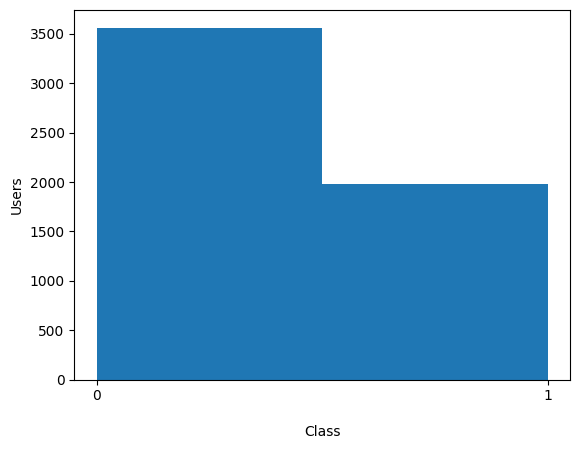

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

print(Counter(tr_y))
plt.hist(tr_y, bins=len(set(tr_y)))
plt.ylabel('Users')
plt.xlabel('Class')

In [7]:
#set(tr_txt[0].split())
tr_txt[5].split()

['putos.',
 'no',
 'tienen',
 'madre.',
 'ambriados',
 'mantenidos.',
 'ojetes.',
 'como',
 'es',
 'posible.',
 'mejor',
 'matarlos']

## Tokenizar un tuit

In [8]:
import nltk 
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [9]:
print(tr_txt[5])
tokenizer.tokenize(tr_txt[5])

putos. no tienen madre. ambriados mantenidos. ojetes. como es posible. mejor matarlos



['putos',
 '.',
 'no',
 'tienen',
 'madre',
 '.',
 'ambriados',
 'mantenidos',
 '.',
 'ojetes',
 '.',
 'como',
 'es',
 'posible',
 '.',
 'mejor',
 'matarlos']

In [10]:
corpus_palabras = []
for doc in tr_txt:
    corpus_palabras += tokenizer.tokenize(doc)

In [11]:
len(set(corpus_palabras))

13580

In [12]:
fdist = nltk.FreqDist(corpus_palabras) # cuántas veces aparece cada palabra

In [13]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict] #lista de pares ordenada (más frecuente a menos)
    aux.sort()
    aux.reverse()
    return aux #regresa el objeto ordenado en reversa

In [14]:
V = sortFreqDict(fdist)
V

[(3383, 'que'),
 (3357, 'de'),
 (2774, '.'),
 (2629, 'a'),
 (2433, 'la'),
 (2266, 'y'),
 (1824, 'no'),
 (1613, 'me'),
 (1505, '!'),
 (1303, 'el'),
 (1263, '@usuario'),
 (1191, 'en'),
 (1148, 'verga'),
 (1079, 'madre'),
 (969, 'se'),
 (895, 'putas'),
 (888, 'los'),
 (867, 'es'),
 (831, 'putos'),
 (786, '?'),
 (770, 'con'),
 (763, 'por'),
 (718, 'mi'),
 (697, 'un'),
 (693, 'te'),
 (683, 'ya'),
 (662, 'si'),
 (652, '"'),
 (644, 'lo'),
 (628, 'las'),
 (566, 'como'),
 (565, 'para'),
 (556, 'loca'),
 (549, 'su'),
 (525, 'tu'),
 (502, 'una'),
 (472, '...'),
 (439, 'pero'),
 (409, 'le'),
 (377, '😂'),
 (359, 'al'),
 (329, 'del'),
 (314, 'más'),
 (303, 'yo'),
 (296, 'pinche'),
 (281, 'cuando'),
 (277, 'puta'),
 (273, 'qué'),
 (263, 'todos'),
 (260, 'o'),
 (259, ':'),
 (250, 'bien'),
 (244, 'son'),
 (241, 'estoy'),
 (240, '¿'),
 (238, 'les'),
 (233, 'hdp'),
 (230, 'porque'),
 (229, 'sus'),
 (218, 'todo'),
 (209, 'joto'),
 (208, 'ni'),
 (199, 'hasta'),
 (198, 'esta'),
 (189, 'está'),
 (183, '…'),


In [15]:
dict_indices = dict()
cont = 0
for weight, word in V:
    dict_indices[word]=cont
    cont+=1

In [16]:
dict_indices

{'que': 0,
 'de': 1,
 '.': 2,
 'a': 3,
 'la': 4,
 'y': 5,
 'no': 6,
 'me': 7,
 '!': 8,
 'el': 9,
 '@usuario': 10,
 'en': 11,
 'verga': 12,
 'madre': 13,
 'se': 14,
 'putas': 15,
 'los': 16,
 'es': 17,
 'putos': 18,
 '?': 19,
 'con': 20,
 'por': 21,
 'mi': 22,
 'un': 23,
 'te': 24,
 'ya': 25,
 'si': 26,
 '"': 27,
 'lo': 28,
 'las': 29,
 'como': 30,
 'para': 31,
 'loca': 32,
 'su': 33,
 'tu': 34,
 'una': 35,
 '...': 36,
 'pero': 37,
 'le': 38,
 '😂': 39,
 'al': 40,
 'del': 41,
 'más': 42,
 'yo': 43,
 'pinche': 44,
 'cuando': 45,
 'puta': 46,
 'qué': 47,
 'todos': 48,
 'o': 49,
 ':': 50,
 'bien': 51,
 'son': 52,
 'estoy': 53,
 '¿': 54,
 'les': 55,
 'hdp': 56,
 'porque': 57,
 'sus': 58,
 'todo': 59,
 'joto': 60,
 'ni': 61,
 'hasta': 62,
 'esta': 63,
 'está': 64,
 '…': 65,
 'marica': 66,
 'ser': 67,
 'q': 68,
 'así': 69,
 'soy': 70,
 'vale': 71,
 'hay': 72,
 'puto': 73,
 'eso': 74,
 'pinches': 75,
 'voy': 76,
 'mis': 77,
 'ver': 78,
 'este': 79,
 'quiero': 80,
 'solo': 81,
 'luchona': 82,
 '

## BOW Binario

In [20]:
import numpy as np

def Binary_build_bow_tr(tweets, V, dict_indices): #string de tweets, vocabulario (frecuencia de palabras), diccionario de indices
    BOW = np.zeros((len(tr_txt),len(V)), dtype=int) #tweets * vocabulario  (si la palabra existe, pongo un 1 en mi matriz, si no, escribo un 0)
    cont = 0  
    '''
        tokenizer.tokenize(): recibe un tweet y lo separa de forma inteligente (por palabras). No se hace con split porque no sólo se separan por espacios
        FreqDist: mapa (regresa la frecuencia [cubetas de palabras])
        dict_indices: global (por todos los tweets [cubeta ordenada ascendente])
    
    '''
    for i in tweets:
        word_map = nltk.FreqDist(tokenizer.tokenize(i))
        for word in word_map:
            if word in dict_indices:
                BOW[cont, dict_indices[word]] = 1 
        cont += 1
    return BOW  #bolsa de palabras (Número de documentos * número de palabras )

Binary_build_bow_tr(tr_txt, V, dict_indices)


array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [21]:
BOW_tr = Binary_build_bow_tr(tr_txt, V, dict_indices)

In [22]:
BOW_tr.shape

(5544, 13580)

In [23]:
BOW_tr[0,:]

array([1, 1, 0, ..., 0, 0, 0])

### Bolsa de Terminos Validación

Counter({'0\n': 397, '1\n': 219})


Text(0.5, 0, 'Class')

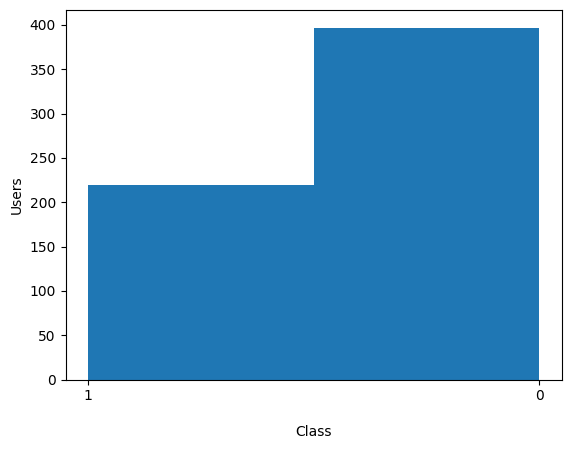

In [24]:
val_txt, val_y = get_texts_from_file('./mex_val.txt', "./mex_val_labels.txt")

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

print(Counter(val_y))
plt.hist(val_y, bins=len(set(val_y)))

plt.ylabel('Users')
plt.xlabel('Class')

In [26]:
BOW_val = Binary_build_bow_tr(val_txt, V, dict_indices)
BOW_val.shape

(616, 13580)

### Clasificación   

In [27]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV    
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support

parameters = {'C': [.05, .25, 1, 2]} # complejidad del algoritmo

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)


tr_y = list(map(int,tr_y))
grid.fit(BOW_tr, tr_y)

val_y = list(map(int,val_y))
y_pred = grid.predict(BOW_val)


p,r,f,_ = precision_recall_fscore_support(val_y, y_pred, average="macro", pos_label=1)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))



[[334  63]
 [ 51 168]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       397
           1       0.73      0.77      0.75       219

    accuracy                           0.81       616
   macro avg       0.80      0.80      0.80       616
weighted avg       0.82      0.81      0.82       616

